## Logistic Regression Equations

`Logistic regression` – the predicted response variable is limited to a probability between 0 and 1

`Linear regression` – the predicted response variable can take any value and is unconstrained

To perform logistic regression mathematically:

   - The categorical column labels (limited to two values) must be encoded with values of 0 and 1
   - A linear model predicts the log odds instead of predicting the response itself
   - Where p = the probability of a one value occurring, we can calculate the odds ratio

$$log(\dfrac{p}{1−p})=b_0+b_1x_1+b_2x_2+...$$


By taking the log of the odds ratio above and equating it to the linear regression line, the predictions will measure the probability of success from 0 to 1.
$$p=\dfrac{e^{b_0+b_1x_1+b_2x_2+...}}{1+e^{b_0+b_1x_1+b_2x_2+...}}$$


The log of the odd ratio can be reformulated into the equation above to find the probability directly.

### Steps for Fitting Logistic Regression in Python

   - Load libraries. Similar to working with linear regression models, the statsmodels.api library can be used to run logistic regression models.
   - Use dummy variables for categorical columns
   - Impute missing values
   - Use statsmodels Logit() method and pass in the response variable, the intercept, and your explanatory variable, x.
   - Fit the model
   - Get summary results – Note: the code for this is currently `results.summary2()`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\AHamdan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df = pd.read_csv('fraud_dataset.csv')

In [4]:
df.head()

,transaction_id,duration,day,fraud
0,28891,21.302600,weekend,False
1,61629,22.932765,weekend,False
2,53707,32.694992,weekday,False
3,47812,32.784252,weekend,False
4,43455,17.756828,weekend,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  8793 non-null   int64  
 1   duration        8793 non-null   float64
 2   day             8793 non-null   object 
 3   fraud           8793 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 214.8+ KB


 #### Fitting a logistic regression model to a dataset where we would like to predict if a transaction is fraud or not.

there are two columns that need to be changed to dummy variables. Replace each of the current columns to the dummy version. Use the 1 for `weekday` and `True`, and 0 otherwise

In [6]:
import statsmodels.api as sm

In [7]:
df['fraud'].unique()

array([False,  True])

In [8]:
df['day'].unique()

array(['weekend', 'weekday'], dtype=object)

In [9]:
df['day'] = df['day'].map({'weekday': 1, 'weekend':0})
df['fraud'] = df['fraud'].map({True: 1, False:0})

df.head()

,transaction_id,duration,day,fraud
0,28891,21.302600,0,0
1,61629,22.932765,0,0
2,53707,32.694992,1,0
3,47812,32.784252,0,0
4,43455,17.756828,0,0


In [10]:
#instantiate logistic regression model
df['intercept']= 1
logit_mod =sm.Logit(df['fraud'],df[['intercept', 'duration', 'day']])

In [11]:
#fit the model
results = logit_mod.fit()

#get summary statistics
results.summary2() 

Optimization terminated successfully.
         Current function value: 0.002411
         Iterations 16


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: fraud            Pseudo R-squared: 0.963      
Date:               2024-06-30 14:09 AIC:              48.4009    
No. Observations:   8793             BIC:              69.6460    
Df Model:           2                Log-Likelihood:   -21.200    
Df Residuals:       8790             LL-Null:          -578.10    
Converged:          1.0000           LLR p-value:      1.3900e-242
No. Iterations:     16.0000          Scale:            1.0000     
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept       9.8709    1.9438   5.0783  0.0000   6.0613  13.6806
duration       -1.4637    0.2905  -5.0389  0.0000  -2.0331  -0.8944
day             2.5465    0.9043   2.8160  0.0049   0.7741   4.3188
==================================================================

"""

### Reading the summary
- P-Value help us to understand if a particualr variable is significant in helping us if a transaction is fraud or not
- We can't interprete coefficients here the same as we did in linear regression
- First we need to exponentiation each of the coefficients
    - **Quantitative interpretations** for every one unit increase in the explanatory variable $x_1$, we expect a multiplicative change in the odds of being in the 1 category of $e^{b_1}$, holding all over variables constant.

    - **Categorical interpretations** when in category $x_1$, we expect a multiplicative change in the odds of being in the 1 category of $e^{b_1}$, compared to baseline.

In [11]:
results.params

intercept    9.870949
duration    -1.463738
day          2.546470
dtype: float64

In [12]:
# Get the exponentiation
np.exp(results.params[1]), np.exp(results.params[2])

(0.2313697280205684, 12.761978206380197)

In [13]:
# Compmute the reciprocal
1/np.exp(results.params[1])

4.322086595144813

- Fraud is 12.7 times as likely in weekdays than weekends holding all else constant
- For each unit increas in duration, Fraud is 0.23 times as likely holding all else constant
- When you receive multiplicative changes less than 1, it is often useful to compmute the reciprocal. This change the direction of unit increase to unite decrease
- For each unit decrease in duration, Fraud is 4.32 times as likely holding all else constant

### lets answser some questions

In [14]:
#The proportion of fraudulent transactions.
df['fraud'].mean()

0.012168770612987604

In [15]:
#The average duration for fraudulent transaction
df[df.fraud == 1]['duration'].mean()

4.624247370615657

In [16]:
#The average duration for non-fraudulent transactions.
df[df.fraud == 0]['duration'].mean()

30.013583132522555

In [17]:
#The proportion of weekday transactions.
(df.day == 'weekday').mean()
df.groupby('day')['day'].count()/len(df)

day
0    0.654725
1    0.345275
Name: day, dtype: float64

# Example 2

The dataset contains four variables: `admit`, `gre`, `gpa`, and `prestige`:

   - `admit` is a binary variable. It indicates whether or not a candidate was admitted into UCLA (admit = 1) our not (admit = 0).
   - `gre` is the GRE score. GRE stands for Graduate Record Examination.
   - `gpa` stands for Grade Point Average.
   - `prestige` is the prestige of an applicant alta mater (the school attended before applying), with 1 being the highest (highest prestige) and 4 as the lowest (not prestigious).


In [18]:
df = pd.read_csv("admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


There are a few different ways you might choose to work with the `prestige` column in this dataset. For this dataset, we will want to allow for the change from prestige 1 to prestige 2 to allow a different acceptance rate than changing from prestige 3 to prestige 4.

In [19]:
df.prestige.unique()

array([3, 1, 4, 2], dtype=int64)

In [20]:
df[['prest_1', 'prest_2', 'prest_3','prest_4',]] = pd.get_dummies(df['prestige'],dtype = int)
df.head()

,admit,gre,gpa,prestige,prest_1,prest_2,prest_3,prest_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


 Now, fit a logistic regression model to predict if an individual is admitted using gre, gpa, and prestige with a baseline of the prestige value of `1`. Don't forget an intercept.

In [21]:
import statsmodels.api as sm
df['intercept'] = 1

logit_mod = sm.Logit(df['admit'], df[['intercept','gre', 'gpa', 'prest_2', 'prest_3', 'prest_4']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: admit            Pseudo R-squared: 0.082     
Date:               2024-05-14 21:49 AIC:              467.6399  
No. Observations:   397              BIC:              491.5435  
Df Model:           5                Log-Likelihood:   -227.82   
Df Residuals:       391              LL-Null:          -248.08   
Converged:          1.0000           LLR p-value:      1.1761e-07
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
intercept     -3.8769    1.1425  -3.3934  0.0007  -6.1161  -1.6376
gre            0.0022    0.0011   2.0280  0.0426   0.0001   0.0044
gpa            0.7793    0.3325   2.3438  0.0191   0.1276   1.4311
prest_2       -0.6801    0.3169  -2.1459  0.0319  -1.3013  -0.0589
prest_3       -1.3387    0.3449  -3.8819  0.0001  -2.0146  -0.6628
prest_4       -1.5534    0.4175  -3.7211  0.0002  -2.3716  -0.7352
=================================================================

"""

In [22]:
# Compmute the exp
print('gre:', np.exp(results.params[1]))

gre: 1.0022208657835459


In [23]:
print('gpa:', np.exp(results.params[2]))
print('prest_2:', 1/np.exp(results.params[3]))
print('prest_3:', 1/np.exp(results.params[4]))
print('prest_4:', 1/np.exp(results.params[5]))

gpa: 2.1800269274290285
prest_2: 1.9741473907729914
prest_3: 3.813995012900284
prest_4: 4.727566108041524


- If an individual attended the most prestigious alma mater, they are **4.7 times** more likely to be admitted than if they attended the least prestigious, holding all other variables constant.

- If an individual attended the most prestigious alma mater, they are **3.81 times** more likely to be admitted than if they attended the second lowest in prestigious-ness, holding all other variables constant.

- If an individual attended the most prestigious alma mater, they are **1.97 times** more likely to be admitted than if they attended the second most prestigious, holding all other variables constant.

- For every one point increase in gpa, an individual is **2.18 times** more likely to be admitted, holding all other variables constant.

# Model Diagnostics + Performance Metrics

When determining how well your model is performing, the most common measure to use is accuracy.

$$Accuracy=\dfrac {number  .of .correctly .labeled .rowsnumber of .total .rows .in .dataset} {number .of .total .rows .in .datasetnumber .of .correctly .labeled .rows}$$

However, accuracy is not always the best measure, especially for unbalanced datasets. In the next few pages, we will cover other types of metrics that will help us determine if our models are performing well.

**Recall (Sensitivity):** $\dfrac{True Positive} {(True Positive + False Negative)}$

- The probablity of algorithm to correctly identify item
- Out of all the items that are truly positive, how many were correctly classified as positive. Or simply, how many positive items were 'recalled' from the dataset.

**Precision:** $\dfrac{True Positive} {(True Positive + False Positive)}$

- The rate of our algorithm opresrved the needed item correctly 
- Out of all the items labeled as positive, how many truly belong to the positive class.

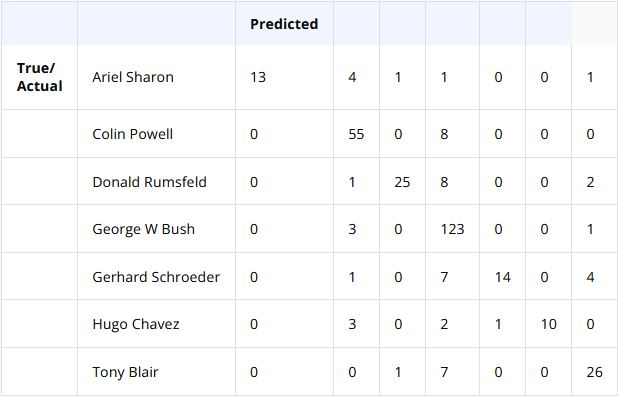

The **recall** rate on Hugo Chavez is the probability of the algorithm classifying an image as Hugo Chavez and the person is Hugo Chavez, here that was 10/16 or 0.625.

The **precision** rate on Hugo Chavez is the probability that the algorithm correctly observes that the image is Hugo Chavez, here that was 10/10 or 1.

# Model Diagnostics

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [25]:
df.head()

,admit,gre,gpa,prestige,prest_1,prest_2,prest_3,prest_4,intercept
0,0,380,3.61,3,0,0,1,0,1
1,1,660,3.67,3,0,0,1,0,1
2,1,800,4.00,1,1,0,0,0,1
3,1,640,3.19,4,0,0,0,1,1
4,0,520,2.93,4,0,0,0,1,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   admit      397 non-null    int64  
 1   gre        397 non-null    int64  
 2   gpa        397 non-null    float64
 3   prestige   397 non-null    int64  
 4   prest_1    397 non-null    int32  
 5   prest_2    397 non-null    int32  
 6   prest_3    397 non-null    int32  
 7   prest_4    397 non-null    int32  
 8   intercept  397 non-null    int64  
dtypes: float64(1), int32(4), int64(4)
memory usage: 21.8 KB


In [27]:
#create response and explanatory variables
y = df['admit']
X = df[['gre', 'gpa','prest_1','prest_2','prest_3']]

In [32]:
len(y)

397

In [35]:
#create the train test split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=0)

In [31]:
len(X_train)

317

In [34]:
len(y_test)

80

In [36]:
#instantiate logistic regression model
log_mod = LogisticRegression()

#fit the model to the training data
log_mod.fit(X_train, y_train)

#create predictions using test data
y_preds = log_mod.predict(X_test)

#print summary statistics
print(precision_score(y_test, y_preds))
print(recall_score(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
confusion_matrix(y_test, y_preds)

1.0
0.20833333333333334
0.7625


C:\Users\AHamdan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[56,  0],
       [19,  5]], dtype=int64)

#### Confusion Matrix
    The predicted is across the columns, and the actual is across the rows. like below,

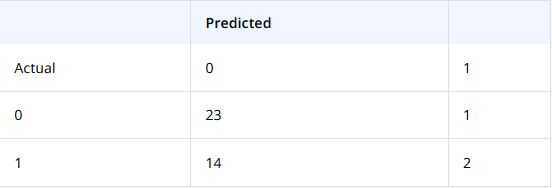

The number of non-admits correctly identified as non-admits **56**

The number of admits correctly identified as admits **5**

The number of admits incorrectly identified as non-admits **19**

The number of non-admits incorrectly identified as admits **0**

If we really care about correctly identifying the accepted students as accepted, which metric do we care about the most? **Recall**

If we only care obtaining the most correctly identified cases whether accepted or non-accepted, which metric do we care about the most? **Accuracy**

What was the recall for the test data? **5/(5+19) = 0.208**

What was the precision for the test data? **5/(5+0) = 1**